## What is this notebook about ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from mpl_toolkits.mplot3d import Axes3D

#### Defining the axis rotation angles

In [2]:
theta = np.array([np.pi/15,-np.pi/9, -np.pi/20])

#### Defining singular values

In [3]:
sigma = np.diag([3,1,0.5])

#### Defining rotation matrices

In [4]:
Rx = np.array([[1,0,0],
               [0, np.cos(theta[0]),-np.sin(theta[0])],
               [0,np.sin(theta[0]),np.cos(theta[0])]])

Ry = np.array([[np.cos(theta[1]),0,np.sin(theta[1])],
               [0,1,0],
               [-np.sin(theta[1]),0,np.cos(theta[2])]])

Rz = np.array([[np.cos(theta[2]),-np.sin(theta[2]),0],
               [np.sin(theta[2]),np.cos(theta[2]),0],
               [0,0,1]])

### Plotting sphere

In [6]:
u = np.linspace(-np.pi,np.pi,100)
v = np.linspace(0,np.pi,100)
x = np.outer(np.cos(u),np.sin(v))
y = np.outer(np.sin(u),np.sin(v))
z = np.outer(np.ones(np.size(u)),np.cos(v))

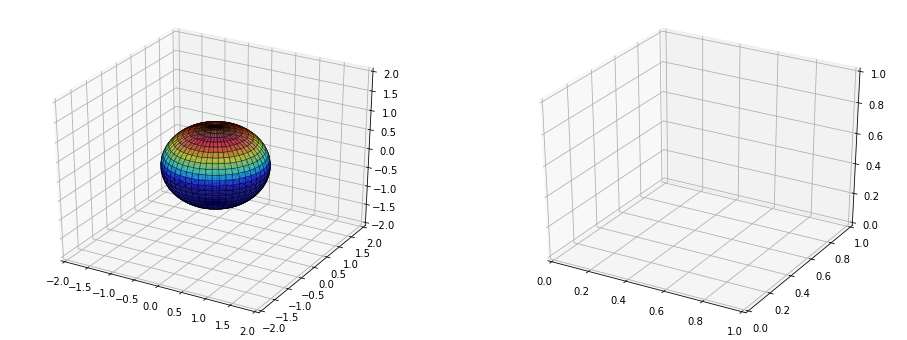

In [24]:
fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw={'projection':'3d'})
surf1 = ax[0].plot_surface(x,y,z,cmap='gray',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=60,ccount=30)
surf1.set_edgecolor('black')
ax[0].set_xlim3d(-2,2)
ax[0].set_ylim3d(-2,2)
ax[0].set_zlim3d(-2,2)
plt.show()